In [24]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

## Reading the data

In [25]:
df=pd.read_csv("data",sep='\t',names=["Label","Message"])

### Exploring the data 

In [26]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.Label.unique() 

array(['ham', 'spam'], dtype=object)

In [28]:
df.isnull().sum() ## checking for null values 

Label      0
Message    0
dtype: int64

<AxesSubplot: xlabel='Label', ylabel='count'>

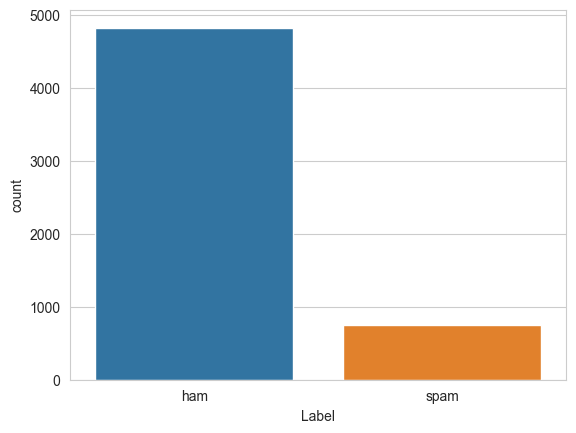

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

### Preprocessing the data 

In [30]:
def preprocessing(text):
    """Changing text to lowercase ,removing extra spaces and cleaning the text.
    """
    text= text.lower().strip() 
    
    text=re.sub('[^a-zA-Z]',' ',text)
    
    text=re.sub(' +', ' ', text)
    return text

In [31]:
df['Message']=df['Message'].apply(preprocessing)

In [32]:
df.head()

,Label,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [33]:
## Encoding 0 for ham and 1 for Spam

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
LE=LabelEncoder()
LE.fit(df["Label"])

LabelEncoder()

In [36]:
df["Label"]=LE.transform(df["Label"])

In [37]:
df

,Label,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...
...,...,...
5567,1,this is the nd time we have tried contact u u ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that so any other suggest...
5570,0,the guy did some bitching but i acted like i d...


<AxesSubplot: xlabel='Label', ylabel='count'>

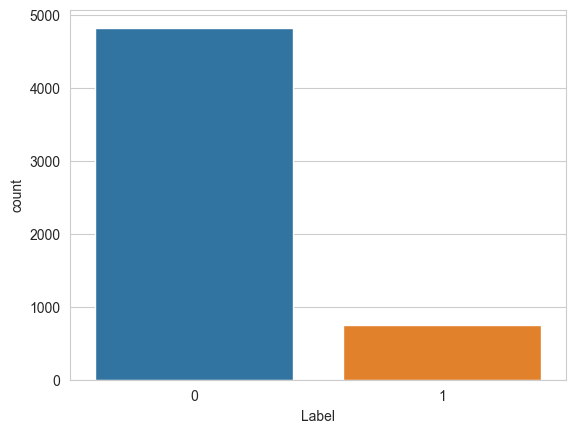

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

### Converting messages to Embeddings

In [39]:
#  We could have used Tradition embeddings schmes like TFIDF or Bag of words but in that our model will only support only 1 language.
#  We are going to use multilingual model.Multilingual model is basically a pretrained deep neural network model which produces same vectors
#  for similar meaning of text in different languages. 
## We can use any multilingual sentence embedder like tensorfow's Unisversal Sentence Enbedder or ker.

In [40]:
# How a multilimgual model works?
# One common approach is to turn any incoming language into a language-agnostic vector in a space,
# where all languages for the same input would point to the same area. 
# That is to say, any incoming phrases with the same meaning would map to the same area in latent space.
# Multilingual Embeddings explained  -->https://www.youtube.com/watch?v=uP6k7ZTuaoI

In [41]:
# sentence_transformers provides multilingual sentence embedding models for the following languges:
# Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, Russian, Spanish, Turkish.
#  link for model https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/multilingual-models.md

In [42]:
from sentence_transformers import SentenceTransformer

In [43]:
Encoder = SentenceTransformer('distiluse-base-multilingual-cased') # import the same model

In [45]:
embeddings=Encoder.encode(df["Message"]) # Encode text into vectors 

In [ ]:
len(embeddings)

5572

In [ ]:
embeddings[0]

array([ 7.10190088e-02, -3.65180410e-02, -5.85367263e-04, -9.86820832e-03,
        3.75818685e-02, -5.61738312e-02, -8.53606500e-03,  6.32724492e-03,
        3.41476239e-02,  2.84873117e-02, -1.44444872e-02,  3.87810692e-02,
        1.30251059e-02,  4.19219695e-02,  1.60155836e-02, -4.72075008e-02,
        4.20365110e-02,  1.96884423e-02, -1.92395411e-04, -4.39579375e-02,
       -3.83087657e-02, -5.19170891e-03, -7.14668632e-02, -2.63324752e-02,
        5.23170903e-02, -2.49114968e-02, -2.11825762e-02,  6.47861660e-02,
       -5.13798324e-03, -1.66555885e-02,  3.36918943e-02,  2.75700055e-02,
       -4.66383668e-03, -2.40476225e-02,  1.26287909e-02, -6.72872439e-02,
        2.87635140e-02,  3.97276878e-02, -4.53051440e-02,  2.89400108e-02,
       -3.44491117e-02,  1.78153627e-02,  5.15714064e-02,  3.22138406e-02,
        9.59002674e-02,  5.84095391e-03,  1.30946636e-02, -6.10704860e-03,
       -4.39988077e-02, -7.63230026e-03,  3.50430720e-02,  3.28807090e-03,
        9.53786727e-03,  

In [ ]:
print(embeddings[0].shape)

(512,)


## Preparing the train and test data

In [ ]:
x=embeddings
y=df["Label"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print("Training set of X and y-->",len(X_train),len(y_train))
print("Test set of X and y-->",len(X_test),len(y_test))

Training set of X and y--> 4457 4457
Test set of X and y--> 1115 1115


## Apply Classification algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier=SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_svc=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.9865470852017937

### When your dataset is imbalanaced,Confusion Matrix gives us more clearity than the accuracy matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred_svc)

array([[961,   5],
       [ 10, 139]], dtype=int64)

## Visualize the Confusion matrix 

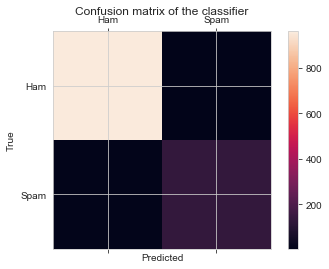

[[961   5]
 [ 10 139]]


In [ ]:
labels = ['Ham', 'Spam']
cm=confusion_matrix(y_test,y_pred_svc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

## Predicting for new input 

In [ ]:
# classifier.predict(['hey'])

In [ ]:
# We have trained our model 0 for ham and 1 for Spam
def prediction(predict_text):
    predict_data=Encoder.encode([predict_text])
    if classifier.predict(predict_data)[0]>0:
        return "Spam"
    else:
        return "Ham"

In [ ]:
prediction("Per favore, inoltrami che la presentazione sarà fine della giornata")

'Ham'

In [ ]:
# sample inputs:
# Spam:
# English -->Click here to get the prize money.
# Arabic-->انقر هنا للحصول على أموال الجائزة.
# German-->Klicken Sie hier, um das Preisgeld zu erhalten.
# Ham :
# English-->Please forward me that presentation be end of the day
# French-->Veuillez me faire parvenir cette présentation en fin de journée
# Italian->Per favore, inoltrami che la presentazione sarà fine della giornata